In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

from google.colab import files
uploaded = files.upload()


Saving college.csv to college.csv


In [4]:
data1 = pd.read_csv(io.StringIO(uploaded['college.csv'].decode('utf-8')))
data1.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
#Try to predict the number of applications received
#  using the other variables in the
#  college.csv data set.

# (a) Do a thorough exploratory analysis on data set
# (b) Split the data set into a training set and a test set.
# (c) Fit a linear model using least squares on the training set, and
#     report the test error obtained.
#     (c-1) select predictors based on t-test results
#     (c-2) select predictors based on step-wise method and k-fold cross validation
# (d) Fit a ridge regression model on the training set, with ?? chosen
#     by cross-validation. Report the test error obtained.
# (e) Fit a lasso model on the training set, with ?? chosen by cross-validation.
#     Report the test error obtained.
# (f) Fit a regression tree to the training set. Report the test error obtained.
# (g) Use the bagging approach in order to analyze this data. Report the test error obtained.
# (h) Use random forests to analyze the data set. Report the test error obtained.
# (j) Compare the test errors across the all models. Which one is better?

In [5]:
data1.shape

(777, 19)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [7]:
data1.isna().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [8]:
data2 = data1.iloc[:,1:]

In [9]:
data2.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
data2.shape

(777, 18)

In [11]:
data2.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


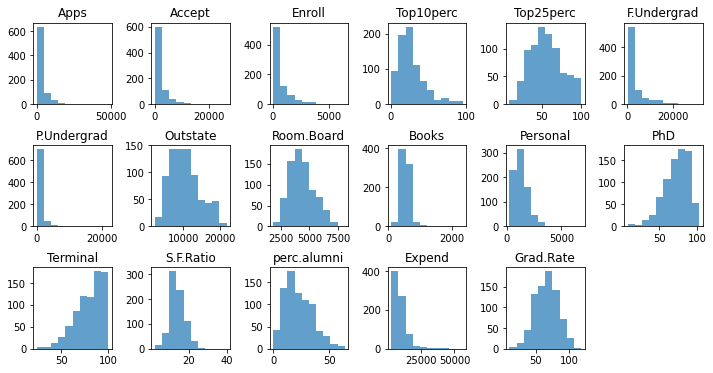

In [12]:
#Continuous variables distribution
plot = plt.figure(figsize = (12, 6))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 18):
    a = plot.add_subplot(3, 6, i)
    a.hist(data2.iloc[: , i], alpha = 0.7)
    a.title.set_text(data2.columns[i])

In [ ]:
#TODO:We see that Apps is skewed, so we can transform it to normal distribution for better analysis

Text(0.5, 1.0, 'Boxplot of Applications')

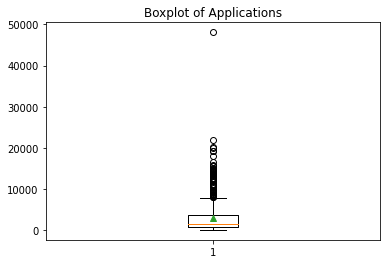

In [13]:
#Box plot of Apps
plt.boxplot(data2['Apps'], showmeans = True)
plt.title('Boxplot of Applications')

In [14]:
#remove the outlier for better analysis
data2 = data2.loc[data2['Apps'] !=data2['Apps'].max(),:]

Text(0.5, 1.0, 'Boxplot of Applications')

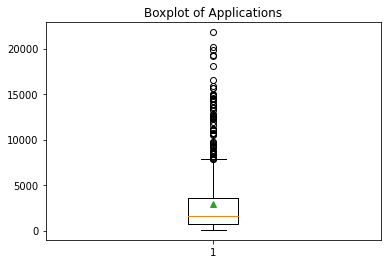

In [15]:
#Box plot of Apps
plt.boxplot(data2['Apps'], showmeans = True)
plt.title('Boxplot of Applications')

In [16]:
#Spearman Rank Correlation Analysis
corr_table = round(data2.iloc[:, range(18)].corr(method = 'spearman'), 2)
corr_table

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.00,0.98,0.93,0.31,0.38,0.88,0.39,0.05,0.19,0.23,0.19,0.54,0.50,0.21,-0.08,0.19,0.19
Accept,0.98,1.00,0.95,0.25,0.32,0.90,0.43,0.02,0.14,0.20,0.21,0.50,0.46,0.25,-0.11,0.15,0.15
Enroll,0.93,0.95,1.00,0.22,0.29,0.95,0.49,-0.11,0.01,0.22,0.26,0.43,0.39,0.33,-0.18,0.04,0.08
Top10perc,0.31,0.25,0.22,1.00,0.91,0.17,-0.26,0.50,0.31,0.15,-0.13,0.56,0.52,-0.37,0.43,0.59,0.48
Top25perc,0.38,0.32,0.29,0.91,1.00,0.25,-0.19,0.44,0.30,0.16,-0.09,0.57,0.55,-0.28,0.39,0.52,0.47
F.Undergrad,0.88,0.90,0.95,0.17,0.25,1.00,0.57,-0.16,0.01,0.24,0.28,0.41,0.36,0.38,-0.24,-0.02,0.03
P.Undergrad,0.39,0.43,0.49,-0.26,-0.19,0.57,1.00,-0.40,-0.06,0.11,0.33,0.01,-0.01,0.41,-0.46,-0.32,-0.27
Outstate,0.05,0.02,-0.11,0.50,0.44,-0.16,-0.40,1.00,0.66,-0.04,-0.35,0.39,0.41,-0.58,0.55,0.75,0.59
Room.Board,0.19,0.14,0.01,0.31,0.30,0.01,-0.06,0.66,1.00,0.10,-0.24,0.37,0.41,-0.35,0.27,0.57,0.44
Books,0.23,0.20,0.22,0.15,0.16,0.24,0.11,-0.04,0.10,1.00,0.23,0.16,0.17,0.01,-0.06,0.13,-0.03


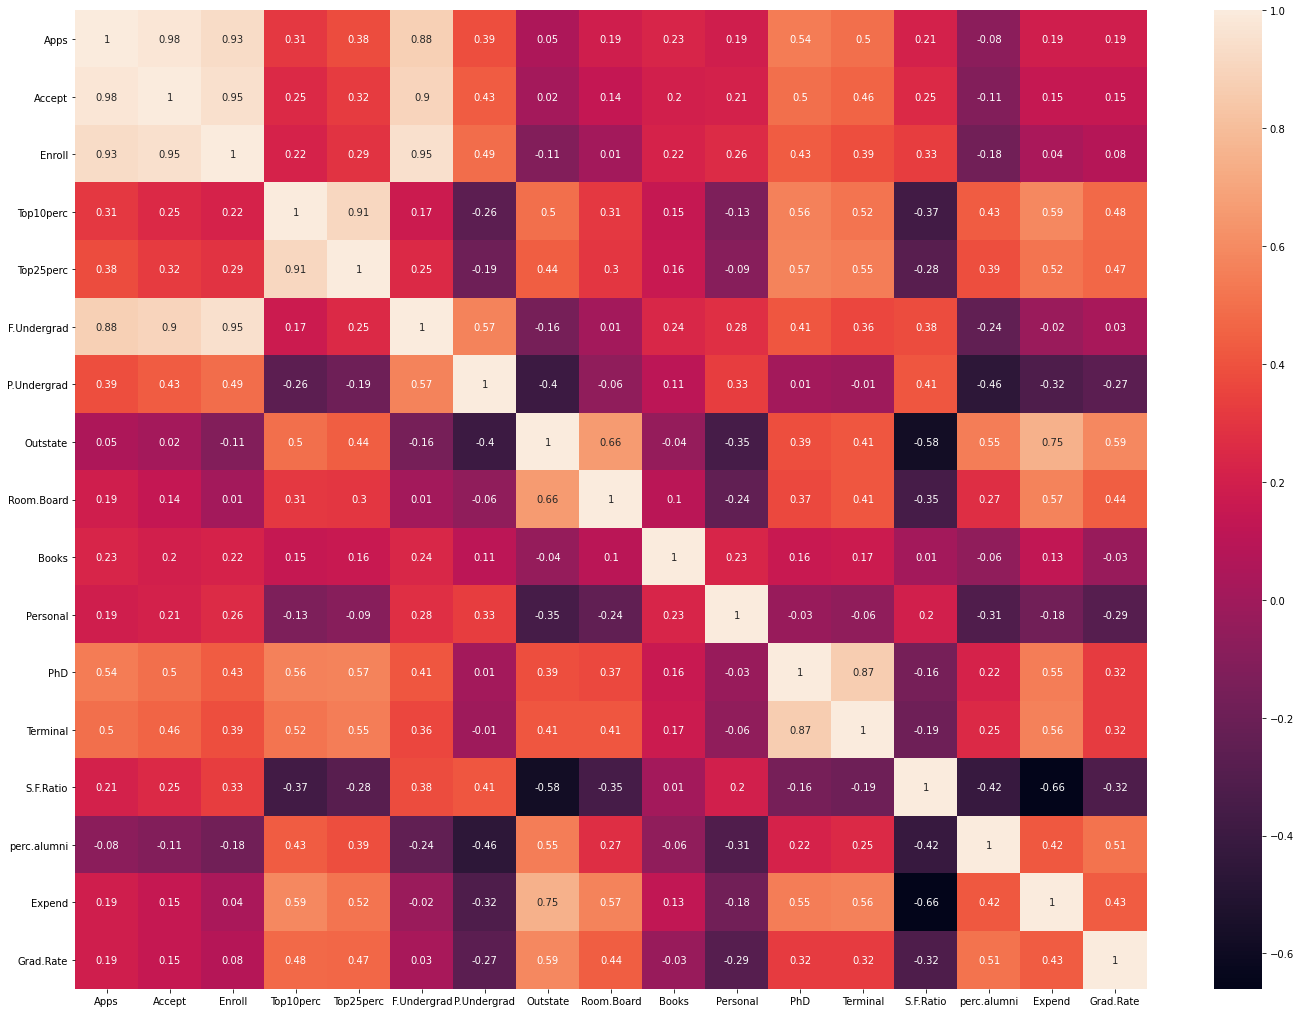

In [17]:
plt.figure(figsize = (24, 18))
sns.heatmap(corr_table, annot = True)

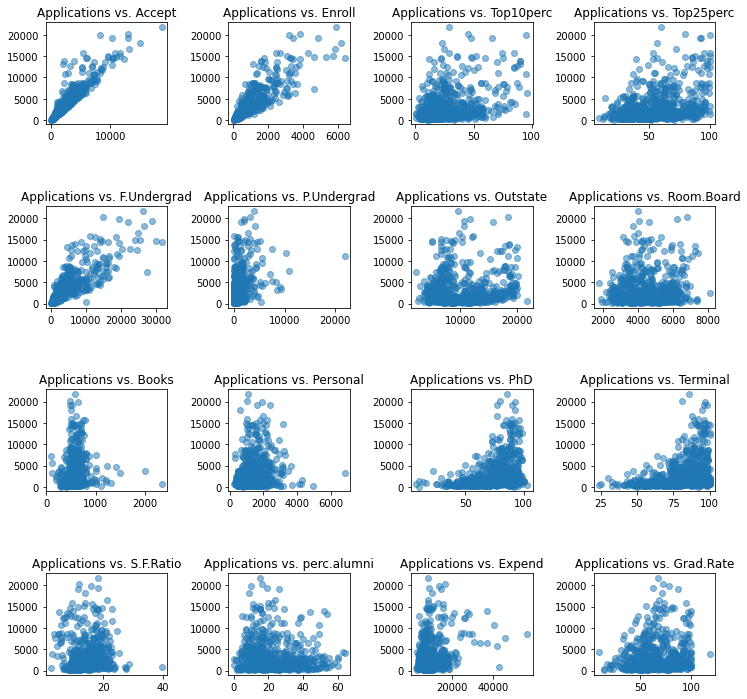

In [18]:
#Scatter Plot
var_ind = list(range(2, 18))
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.8, wspace = 0.5)
for i in range(1,17):
    a = plot.add_subplot(4, 4, i)
    a.scatter(x = data2.iloc[: , var_ind[i-1]], y = data2.iloc[: , 1], alpha = 0.5)
    a.title.set_text('Applications vs. ' + data2.columns[var_ind[i-1]])



In [19]:
data2['Private'].value_counts()

Yes    565
No     211
Name: Private, dtype: int64

# create dummy variables for categorical variables:

In [24]:
dummies = pd.get_dummies(data2[['Private']])
dummies.head()

In [21]:
data2.drop(['Private'] , axis = 1, inplace=True)
data2 = pd.concat([data2, dummies['Private_Yes']], axis=1)
data2.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


# split data to test and train:

In [25]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data2, test_size = 0.2, random_state = 1234)

In [26]:
train.shape

(620, 18)

In [27]:
test.shape

(156, 18)

In [28]:
train.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,2908.698387,1968.887097,762.758065,27.829032,56.000000,3587.785484,843.295161,10541.985484,4375.669355,548.748387,1328.258065,72.724194,79.703226,14.061290,22.795161,9819.474194,65.811290,0.738710
std,3461.684185,2259.455383,910.779318,17.673208,19.763627,4651.675945,1548.344847,4052.778694,1089.738103,152.992343,659.175655,16.584334,14.891931,4.073194,12.357033,5520.739765,17.269456,0.439693
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2580.000000,1880.000000,120.000000,250.000000,10.000000,24.000000,2.500000,0.000000,3186.000000,10.000000,0.000000
25%,753.500000,588.000000,239.750000,15.000000,41.000000,1000.000000,85.250000,7383.000000,3600.000000,475.000000,847.500000,62.000000,70.000000,11.475000,13.000000,6844.000000,54.000000,0.000000
50%,1562.000000,1100.500000,428.000000,24.000000,54.500000,1707.500000,331.000000,10030.000000,4200.000000,511.500000,1200.000000,75.000000,82.000000,13.500000,21.000000,8479.500000,65.000000,1.000000
75%,3588.500000,2332.750000,868.750000,36.000000,69.000000,3801.750000,943.000000,13152.000000,5081.000000,600.000000,1692.500000,86.000000,92.000000,16.400000,31.000000,10895.250000,79.000000,1.000000
max,20192.000000,15096.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2000.000000,4913.000000,103.000000,100.000000,39.800000,63.000000,56233.000000,118.000000,1.000000


In [29]:
test.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,3081.961538,2061.352564,824.416667,26.429487,54.839744,4032.051282,884.692308,10057.429487,4282.916667,550.993590,1385.576923,72.294872,79.602564,14.167949,22.564103,9021.826923,64.006410,0.685897
std,3738.177273,2421.988511,957.220283,17.565036,19.980796,5402.696850,1405.642843,3896.857017,1127.438181,207.044346,744.521262,15.306426,14.070183,3.462499,12.603215,3778.453922,16.816082,0.465652
min,213.000000,166.000000,85.000000,1.000000,12.000000,364.000000,3.000000,2340.000000,1780.000000,96.000000,400.000000,8.000000,37.000000,4.600000,0.000000,3930.000000,18.000000,0.000000
25%,808.500000,626.000000,247.750000,15.000000,39.750000,964.000000,130.250000,7138.250000,3551.250000,450.000000,947.500000,61.750000,71.000000,11.600000,13.000000,6648.250000,52.000000,0.000000
50%,1553.000000,1239.500000,466.000000,23.000000,53.000000,1702.500000,486.500000,9864.000000,4165.000000,500.000000,1200.000000,75.500000,81.500000,13.750000,20.000000,7954.000000,66.000000,1.000000
75%,3740.000000,2584.250000,990.500000,30.250000,67.250000,4587.750000,1036.750000,12200.000000,4990.000000,600.000000,1673.000000,83.000000,91.000000,16.550000,31.000000,10112.000000,75.000000,1.000000
max,21804.000000,18744.000000,5874.000000,95.000000,100.000000,28938.000000,10962.000000,19700.000000,7262.000000,2340.000000,6800.000000,100.000000,100.000000,25.300000,64.000000,22014.000000,100.000000,1.000000


In [30]:
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0]

# Linear Regression using stats model:

In [31]:
# add constant:
X_train = sm.add_constant(X_train)


#Regression Model
lm = sm.OLS(Y_train, X_train).fit()
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     439.4
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:41:41   Log-Likelihood:                -5127.2
No. Observations:                 620   AIC:                         1.029e+04
Df Residuals:                     602   BIC:                         1.037e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -721.3427    413.737     -1.743      0.082   -1533.887      91.201
Accept          1.2927      0.053     24.262      0.000       1.188       1.397
Enroll          0.0391      0.210      0.186      0.852      -0.373       0.452
Top10perc      39.9637      5.861      6.819      0.000      28.454      51.474
Top25perc     -10.2143      4.735     -2.157      0.031     -19.513      -0.916
F.Undergrad    -0.0065      0.036     -0.179      0.858      -0.078       0.065
P.Undergrad     0.0566      0.033      1.710      0.088      -0.008       0.122
Outstate       -0.0607      0.019     -3.148      0.002      -0.098      -0.023
Room.Board      0.1651      0.051      3.264      0.001       0.066       0.264
Books           0.1451      0.265      0.548      0.584      -0.375       0.666
Personal       -0.0188      0.068     -0.277      0.782      -0.152       0.114
PhD            -5.2778      4.697     -1.124      0.262     -14.503       3.947
Terminal       -5.4862      5.137     -1.068      0.286     -15.575       4.603
S.F.Ratio      19.2703     12.721      1.515      0.130      -5.713      44.254
perc.alumni    -2.4155      4.362     -0.554      0.580     -10.981       6.150
Expend          0.0842      0.012      7.116      0.000       0.061       0.107
Grad.Rate       9.0202      3.029      2.978      0.003       3.072      14.968
Private_Yes  -626.4035    143.321     -4.371      0.000    -907.874    -344.934
==============================================================================
Omnibus:                      409.878   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7422.475
Skew:                           2.641   Prob(JB):                         0.00
Kurtosis:                      19.107   Cond. No.                     1.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

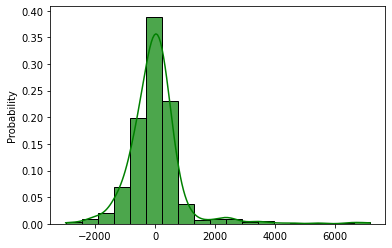

In [32]:
# to check if the assumptions of regression is correct, we Plot histogram of residuals
sns.histplot(lm.resid, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(lm.resid), max(lm.resid), 20))

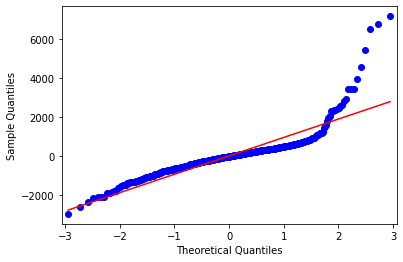

In [33]:
#QQ-plot
qqplot_lm = sm.qqplot(lm.resid, line = 's')
plt.show()

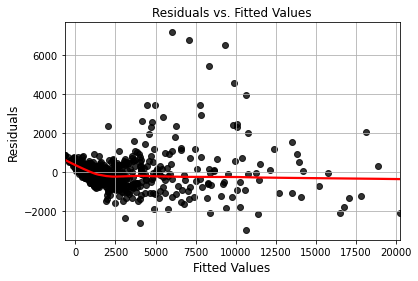

In [34]:
#Residuals vs. Fitted Values
sns.regplot(x = lm.fittedvalues, y = lm.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

In [ ]:
# as we see from the abve plot, we dont have heteroscedasticity problem


In [35]:
#Check Cook's distance
sum(lm.get_influence().summary_frame().cooks_d > 1)

0

In [36]:
#Check Multicollinearity
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(X_train.iloc[:, 1:])
#If VIF > 10 then multicollinearity is high



,variables,VIF
0,Accept,16.787219
1,Enroll,41.672105
2,Top10perc,23.434871
3,Top25perc,51.392562
4,F.Undergrad,30.912047
5,P.Undergrad,2.297311
6,Outstate,31.779194
7,Room.Board,34.166489
8,Books,14.671947
9,Personal,6.276622


from the above we see that we have multicollinearity problem.

t-test results are not reliable for predictors selection.

In [37]:
X_test = test.iloc[:,1:]
X_test = sm.add_constant(X_test)
Y_test = test.iloc[:,0]

In [38]:
pred_basic_lm = lm.predict(X_test)

In [39]:
#Absolute error
abs_err_lm = abs(Y_test - pred_basic_lm)

In [40]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.DataFrame({'Mean of AbsErrors':    abs_err_lm.mean(),
                           'Median of AbsErrors' : abs_err_lm.median(),
                           'SD of AbsErrors' :     abs_err_lm.std(),
                           'IQR of AbsErrors':     iqr(abs_err_lm),
                           'Min of AbsErrors':     abs_err_lm.min(),
                           'Max of AbsErrors':     abs_err_lm.max()}, index = ['BASIC LM'])
model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
BASIC LM,589.56884,316.976211,907.672518,440.473333,0.345312,5744.543389


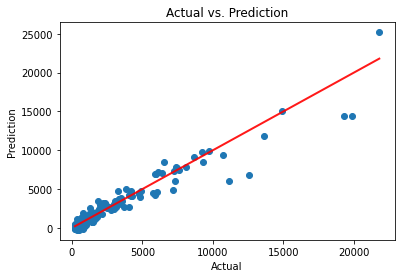

In [42]:
#Actual vs. Prediction
plt.scatter(x = Y_test, y = pred_basic_lm)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(Y_test.min(), Y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')



In [ ]:
#Test for Skewness and Kurtosis
#Good for sample size > 25

#Jarque-Bera Test (Skewness = 0 ?)
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

#Omnibus K-squared normality test
#The Omnibus test combines the random variables for Skewness and Kurtosis into a single test statistic
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     468.2
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:46:03   Log-Likelihood:                -5208.9
No. Observations:                 621   AIC:                         1.045e+04
Df Residuals:                     603   BIC:                         1.053e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -568.8225    472.852     -1.203      

 so the probability of JB is 0 which is very small so we reject the probability of normal distribution also the probability of Omnibus is 0, which this test also rejects the normality assumption of residuals


# Linear Regression based on t-test results and removal of outlier

In [44]:
lm2 = sm.OLS(Y_train, X_train.loc[:,['const', 'Accept','Enroll','Top10perc', 
                               'Top25perc', 'Outstate', 'Room.Board', 'Expend', 'Grad.Rate', 'Private_Yes']]).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     820.0
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:14:58   Log-Likelihood:                -5134.5
No. Observations:                 620   AIC:                         1.029e+04
Df Residuals:                     610   BIC:                         1.033e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -732.4663    237.305     -3.087      0.002   -1198.499    -266.433
Accept          1.2961      0.051     25.182      0.000       1.195       1.397
Enroll          0.0404      0.132      0.306      0.760      -0.218       0.299
Top10perc      39.3457      5.818      6.762      0.000      27.919      50.772
Top25perc     -13.2901      4.625     -2.874      0.004     -22.373      -4.208
Outstate       -0.0795      0.018     -4.413      0.000      -0.115      -0.044
Room.Board      0.1626      0.049      3.314      0.001       0.066       0.259
Expend          0.0760      0.011      6.910      0.000       0.054       0.098
Grad.Rate       7.5716      2.878      2.630      0.009       1.919      13.224
Private_Yes  -554.1370    132.625     -4.178      0.000    -814.595    -293.679
==============================================================================
Omnibus:                      406.293   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7264.010
Skew:                           2.612   Prob(JB):                         0.00
Kurtosis:                      18.934   Cond. No.                     1.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

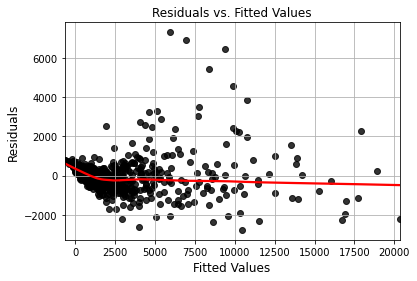

In [45]:
#Residuals vs. Fitted Values
sns.regplot(x = lm2.fittedvalues, y = lm2.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

In [46]:
#Check Cook's distance
sum(lm2.get_influence().summary_frame().cooks_d > 1)

0

In [47]:
pred_lm2 = lm2.predict(X_test[['const', 'Accept','Enroll','Top10perc', 'Top25perc', 'Outstate', 'Room.Board', 'Expend', 'Grad.Rate', 'Private_Yes']])

In [48]:
#Absolute error
abs_err_lm2 = abs(Y_test - pred_lm2)

In [49]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_lm2.mean(),
                           'Median of AbsErrors' : abs_err_lm2.median(),
                           'SD of AbsErrors' :     abs_err_lm2.std(),
                           'IQR of AbsErrors':     iqr(abs_err_lm2),
                           'Min of AbsErrors':     abs_err_lm2.min(),
                           'Max of AbsErrors':     abs_err_lm2.max()}, index = ['improved LM']),ignore_index = False)
model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
BASIC LM,589.568840,316.976211,907.672518,440.473333,0.345312,5744.543389
improved LM,588.033378,350.261335,916.903603,444.940590,9.323908,5757.651010


# Boxcox Transformation:
we know that our apps data is skewed, so we can transform it in order to have normal distribution:

In [50]:
#Box-Cox Transformation
from scipy.special import boxcox, inv_boxcox
box_results, alpha = boxcox(Y_train)

box_results = boxcox(Y_train,alpha)


In [51]:
alpha

-0.06509487370157427

alpha is close to zero, so we consider the log transform

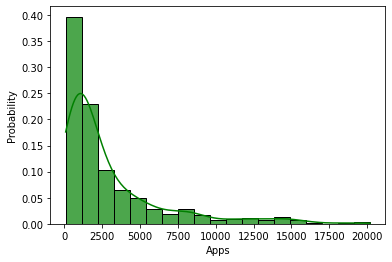

In [52]:
sns.histplot(Y_train, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(Y_train), max(Y_train), 20))

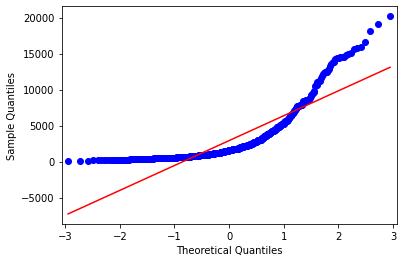

In [53]:
#QQ-plot
qqplot_lm_bc = sm.qqplot(Y_train, line = 's')
plt.show()

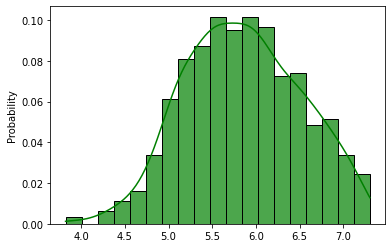

In [54]:
#histogram of transformed data:
sns.histplot(box_results, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(box_results), max(box_results), 20))

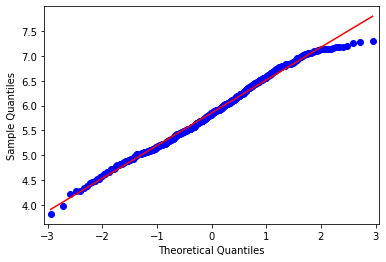

In [55]:
#QQ-plot
qqplot_lm_bc = sm.qqplot(box_results, line = 's')
plt.show()

Text(0.5, 1.0, 'Boxplot of Applications')

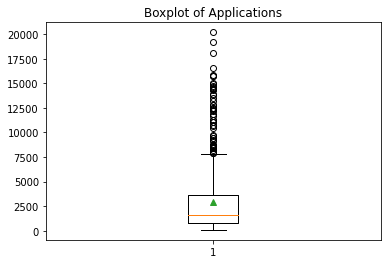

In [56]:
#Box plot of Apps
plt.boxplot(Y_train, showmeans = True)
plt.title('Boxplot of Applications')

Text(0.5, 1.0, 'Boxplot of Applications')

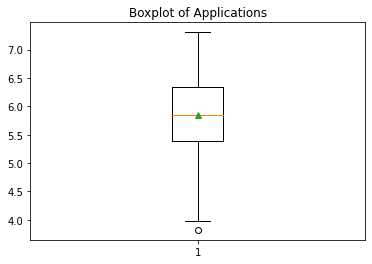

In [57]:
#Box plot of Apps
plt.boxplot(box_results, showmeans = True)
plt.title('Boxplot of Applications')

# regression with transformed data

In [58]:
lm3 = sm.OLS(box_results, X_train).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     117.5
Date:                Fri, 30 Apr 2021   Prob (F-statistic):          2.62e-178
Time:                        18:26:13   Log-Likelihood:                -167.69
No. Observations:                 620   AIC:                             371.4
Df Residuals:                     602   BIC:                             451.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0903      0.139     29.447      0.000       3.818       4.363
Accept          0.0002   1.79e-05      9.803      0.000       0.000       0.000
Enroll       8.135e-05   7.05e-05      1.154      0.249   -5.71e-05       0.000
Top10perc       0.0029      0.002      1.490      0.137      -0.001       0.007
Top25perc       0.0010      0.002      0.624      0.533      -0.002       0.004
F.Undergrad -3.124e-05   1.22e-05     -2.552      0.011   -5.53e-05    -7.2e-06
P.Undergrad  2.973e-05   1.11e-05      2.674      0.008     7.9e-06    5.16e-05
Outstate     1.713e-05   6.47e-06      2.649      0.008    4.43e-06    2.98e-05
Room.Board   1.968e-05    1.7e-05      1.159      0.247   -1.37e-05     5.3e-05
Books           0.0003    8.9e-05      2.924      0.004    8.54e-05       0.000
Personal     3.031e-05   2.27e-05      1.333      0.183   -1.44e-05     7.5e-05
PhD             0.0035      0.002      2.223      0.027       0.000       0.007
Terminal        0.0011      0.002      0.662      0.508      -0.002       0.005
S.F.Ratio       0.0263      0.004      6.154      0.000       0.018       0.035
perc.alumni    -0.0031      0.001     -2.146      0.032      -0.006      -0.000
Expend       1.359e-05   3.97e-06      3.421      0.001    5.79e-06    2.14e-05
Grad.Rate       0.0053      0.001      5.229      0.000       0.003       0.007
Private_Yes    -0.3666      0.048     -7.618      0.000      -0.461      -0.272
==============================================================================
Omnibus:                       79.614   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.308
Skew:                          -0.856   Prob(JB):                     2.76e-27
Kurtosis:                       4.342   Cond. No.                     1.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
pred_lm3 = lm3.predict(X_test)
pred_lm3 = inv_boxcox(pred_lm3,alpha)
#Absolute error
abs_err_lm3 = abs(Y_test - pred_lm3)
abs_err_lm3.mean()

6188.644198825206

In [ ]:
#unfortunately, transforming the data is not helpful to reduce the error

# best subset selection with original Y_train

In [67]:
#Define function to fit linear regression
def fit_lm(feature_set):
    reg_model = sm.OLS(Y_train.loc[Y_train.index!=483], X_train.loc[X_train.index!=483,['const'] + list(feature_set)]).fit()
    return {'model': reg_model, 'RSquared': reg_model.rsquared}



In [68]:
import itertools
def bestsubset_func(k):      
    res = []    
    #Looping over all possible combinations
    for features in itertools.combinations(X_train.iloc[:, 1:].columns, k):
        res.append(fit_lm(features))
    
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
         #Note: numpy.argmax() returns indices of the maximum values along with the specified axis.
    
    #Return the best model
    return best_model


In [69]:
import time #to measure the processing time
models_bestsub = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
    models_bestsub.loc[i] = bestsubset_func(i)
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')



The Processing time is:  509.0240247249603 seconds


In [70]:
models_bestsub

,RSquared,model
1,0.879427,<statsmodels.regression.linear_model.Regressio...
2,0.909463,<statsmodels.regression.linear_model.Regressio...
3,0.914073,<statsmodels.regression.linear_model.Regressio...
4,0.919099,<statsmodels.regression.linear_model.Regressio...
5,0.920552,<statsmodels.regression.linear_model.Regressio...
6,0.921887,<statsmodels.regression.linear_model.Regressio...
7,0.923133,<statsmodels.regression.linear_model.Regressio...
8,0.923866,<statsmodels.regression.linear_model.Regressio...
9,0.924497,<statsmodels.regression.linear_model.Regressio...
10,0.924878,<statsmodels.regression.linear_model.Regressio...


In [71]:
#Adj. RSquared
models_bestsub_adjrs = models_bestsub.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_bestsub_adjrs

1     0.879232
2     0.909169
3     0.913655
4     0.918573
5     0.919905
6     0.921122
7     0.922254
8     0.922870
9     0.923383
10    0.923644
11    0.923845
12    0.923865
13    0.923780
14    0.923685
15    0.923569
16    0.923443
17    0.923320
dtype: float64

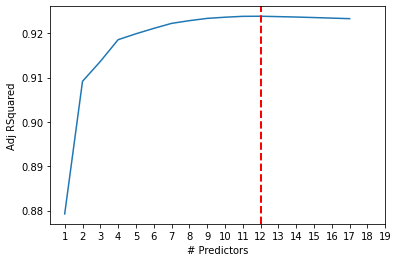

In [72]:
#Adj. RSquared Plot
plt.plot(models_bestsub_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_bestsub_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')



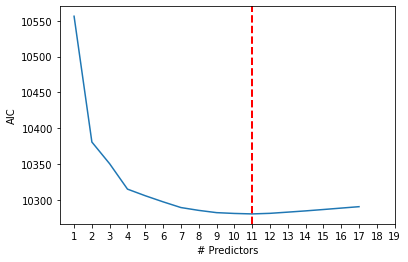

In [73]:
#AIC Plot
models_bestsub_aic = models_bestsub.apply(lambda row: row[1].aic, axis = 1)
plt.plot(models_bestsub_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_bestsub_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

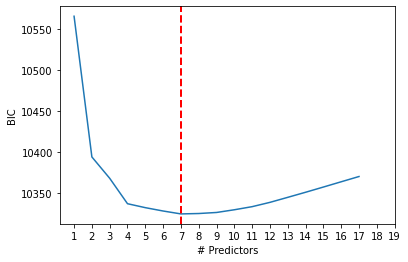

In [74]:
#BIC Plot
models_bestsub_bic = models_bestsub.apply(lambda row: row[1].bic, axis = 1)
plt.plot(models_bestsub_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_bestsub_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

In [ ]:
# so will check with the models of 9,10 and 12 predictors, and after testing we see that 12 predictors is better


In [75]:
pred_bestsub = models_bestsub.loc[12, 'model'].predict(X_test[models_bestsub.loc[12, 'model'].model.exog_names])
abs_err_bestsub = abs(Y_test - pred_bestsub)

In [76]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_bestsub.mean(),
                                             'Median of AbsErrors' : abs_err_bestsub.median(),
                                             'SD of AbsErrors' :     abs_err_bestsub.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_bestsub),
                                             'Min of AbsErrors':     abs_err_bestsub.min(),
                                             'Max of AbsErrors':     abs_err_bestsub.max()}, index = ['BestSubset']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
BASIC LM,589.568840,316.976211,907.672518,440.473333,0.345312,5744.543389
improved LM,588.033378,350.261335,916.903603,444.940590,9.323908,5757.651010
BestSubset,584.686849,310.160763,908.415193,454.756897,1.584682,5774.900418


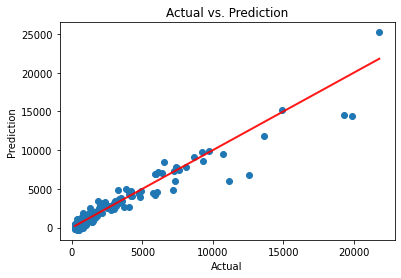

In [77]:
#Actual vs. Prediction
plt.scatter(x = Y_test, y = pred_bestsub)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(Y_test.min(), Y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

# Forward and Backward Stepwise Selection


In [78]:
def forward_func(features):
    res = []
    # Pull out features still needed to process
    remaining_features = [_ for _ in X_train.iloc[:, 1:].columns if _ not in features]
          
    for f in remaining_features:
        res.append(fit_lm(features + [f]))
   
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
    
    #Return the best model
    return best_model



In [79]:
#Forward Selection Implementation
import time #to measure the processing time
models_fw = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
features = []
for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
    models_fw.loc[i] = forward_func(features)
    features = models_fw.loc[i, 'model'].model.exog_names[1:]
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  0.6120693683624268 seconds


In [80]:
models_fw

,RSquared,model
1,0.879427,<statsmodels.regression.linear_model.Regressio...
2,0.909463,<statsmodels.regression.linear_model.Regressio...
3,0.914073,<statsmodels.regression.linear_model.Regressio...
4,0.919099,<statsmodels.regression.linear_model.Regressio...
5,0.920552,<statsmodels.regression.linear_model.Regressio...
6,0.921649,<statsmodels.regression.linear_model.Regressio...
7,0.923133,<statsmodels.regression.linear_model.Regressio...
8,0.923866,<statsmodels.regression.linear_model.Regressio...
9,0.924497,<statsmodels.regression.linear_model.Regressio...
10,0.924868,<statsmodels.regression.linear_model.Regressio...


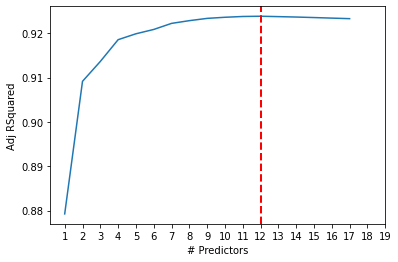

In [81]:
#Adj. RSquared
models_fw_adjrs = models_fw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_fw_adjrs
#Adj. RSquared Plot
plt.plot(models_fw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_fw_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

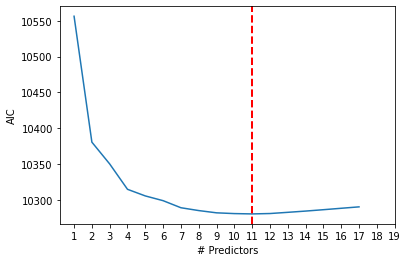

In [82]:
#AIC Plot
models_fw_aic = models_fw.apply(lambda row: row[1].aic, axis = 1)
plt.plot(models_fw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_fw_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

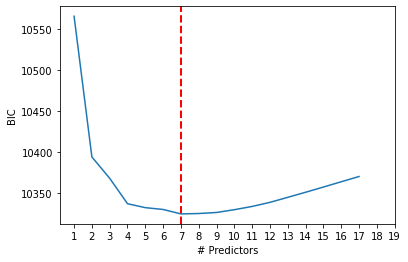

In [83]:
#BIC Plot
models_fw_bic = models_fw.apply(lambda row: row[1].bic, axis = 1)
plt.plot(models_fw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_fw_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

In [84]:
def backward_func(features):
    res = []
    for features in itertools.combinations(features, len(features) - 1):
        res.append(fit_lm(features))
    
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
          
    #Return the best model
    return best_model

In [85]:
#Backward Selection Implementation
models_bw = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
features = X_train.columns
while(len(features) > 1):  
    models_bw.loc[len(features) - 1] = backward_func(features)
    features = models_bw.loc[len(features) - 1]["model"].model.exog_names[1:]
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  0.8882722854614258 seconds


In [86]:
models_bw

,RSquared,model
17,0.925426,<statsmodels.regression.linear_model.Regressio...
16,0.925422,<statsmodels.regression.linear_model.Regressio...
15,0.925421,<statsmodels.regression.linear_model.Regressio...
14,0.925411,<statsmodels.regression.linear_model.Regressio...
13,0.925380,<statsmodels.regression.linear_model.Regressio...
12,0.925341,<statsmodels.regression.linear_model.Regressio...
11,0.925198,<statsmodels.regression.linear_model.Regressio...
10,0.924878,<statsmodels.regression.linear_model.Regressio...
9,0.924486,<statsmodels.regression.linear_model.Regressio...
8,0.923782,<statsmodels.regression.linear_model.Regressio...


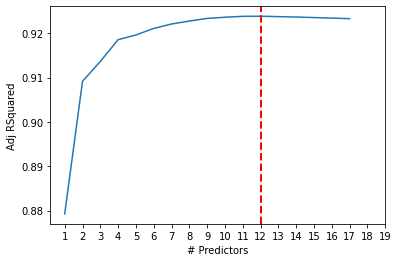

In [87]:
#Adj. RSquared
models_bw_adjrs = models_bw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_bw_adjrs = models_bw_adjrs.sort_index()
#Adj. RSquared Plot
plt.plot(models_bw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_bw_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

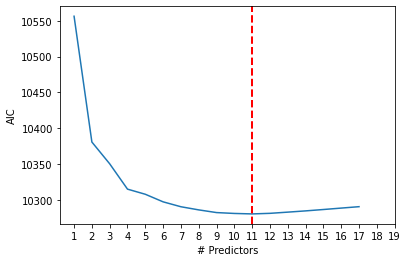

In [88]:
#AIC Plot
models_bw_aic = models_bw.apply(lambda row: row[1].aic, axis = 1)
models_bw_aic = models_bw_aic.sort_index()
plt.plot(models_bw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_bw_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

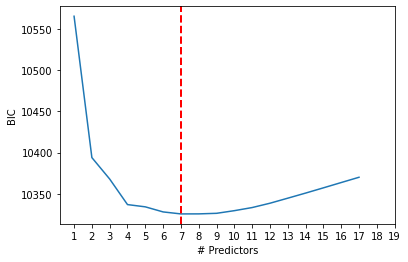

In [89]:
#BIC Plot
models_bw_bic = models_bw.apply(lambda row: row[1].bic, axis = 1)
models_bw_bic = models_bw_bic.sort_index()
plt.plot(models_bw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_bw_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

In [90]:
models_bw.loc[9,'model'].params

const         -358.313884
Accept           1.316300
Top10perc       40.031425
Top25perc      -11.142500
Outstate        -0.070184
Room.Board       0.175397
PhD             -8.417883
Expend           0.077199
Grad.Rate        7.726537
Private_Yes   -672.329571
dtype: float64

In [91]:
models_fw.loc[9,'model'].params

const         -254.817769
Accept           1.315430
Top10perc       38.813820
Expend           0.078035
Private_Yes   -666.773096
Terminal        -9.229527
Room.Board       0.181020
Outstate        -0.069554
Grad.Rate        7.474492
Top25perc      -10.632331
dtype: float64

In [ ]:
# it seams that the forward and backward hae the same parameters

In [92]:
pred_fw = models_fw.loc[9, 'model'].predict(X_test[models_fw.loc[9, 'model'].model.exog_names])


In [ ]:
# so removing the outliers helps a lot in forward or backward
# we see that transforming to boxcox or log increases the error mean a lot

In [93]:
#Absolute error
abs_err_fw = abs(Y_test - pred_fw)
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_fw.mean(),
                                             'Median of AbsErrors' : abs_err_fw.median(),
                                             'SD of AbsErrors' :     abs_err_fw.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_fw),
                                             'Min of AbsErrors':     abs_err_fw.min(),
                                             'Max of AbsErrors':     abs_err_fw.max()}, index = ['Forward Stepwise']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
BASIC LM,589.568840,316.976211,907.672518,440.473333,0.345312,5744.543389
improved LM,588.033378,350.261335,916.903603,444.940590,9.323908,5757.651010
BestSubset,584.686849,310.160763,908.415193,454.756897,1.584682,5774.900418
Forward Stepwise,580.300768,304.215344,913.765411,428.671338,0.668580,5768.595859


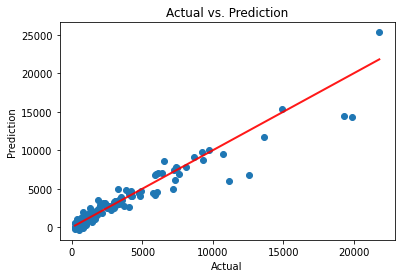

In [94]:
#Actual vs. Prediction
plt.scatter(x = Y_test, y = pred_fw)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(Y_test.min(), Y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

# Ridge and Lasso Regression




In [96]:
lambda_grid = 10 ** np.linspace(5, -2, 100)

In [97]:
from sklearn.linear_model import Ridge, RidgeCV
ridgereg = Ridge(normalize = True)

models = pd.DataFrame(index = lambda_grid, columns = X_train.columns)
coefs = []
for i in lambda_grid:
    ridgereg.set_params(alpha = i)
    ridgereg.fit(X_train, Y_train)
    models.loc[i, :] = ridgereg.coef_
models.shape   

(100, 18)

In [98]:
models.head()

,const,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
100000.000000,0,1.4367e-05,3.33569e-05,0.000702829,0.00065012,6.24324e-06,9.19606e-06,6.10422e-07,6.07596e-06,3.5338e-05,9.19594e-06,0.000884292,0.000916758,0.000515118,-0.000233608,1.86894e-06,0.000324869,-0.0355084
84975.343591,0,1.69072e-05,3.92545e-05,0.000827091,0.000765062,7.34706e-06,1.08219e-05,7.18344e-07,7.15021e-06,4.15858e-05,1.08218e-05,0.00104063,0.00107884,0.000606194,-0.000274912,2.19938e-06,0.000382307,-0.0417864
72208.090184,0,1.98964e-05,4.61948e-05,0.00097332,0.000900325,8.64604e-06,1.27353e-05,8.45346e-07,8.41437e-06,4.89381e-05,1.27351e-05,0.00122462,0.00126958,0.000713371,-0.000323519,2.58823e-06,0.000449899,-0.0491743
61359.072734,0,2.34141e-05,5.43621e-05,0.0011454,0.0010595,1.01747e-05,1.49868e-05,9.94799e-07,9.90203e-06,5.75902e-05,1.49866e-05,0.00144112,0.00149403,0.000839497,-0.00038072,3.04583e-06,0.000529442,-0.0578683
52140.082880,0,2.75537e-05,6.39732e-05,0.0013479,0.00124681,1.19735e-05,1.76364e-05,1.17067e-06,1.16527e-05,6.77719e-05,1.76361e-05,0.0016959,0.00175816,0.00098792,-0.000448034,3.58432e-06,0.000623046,-0.0680992


Text(0, 0.5, 'weights')

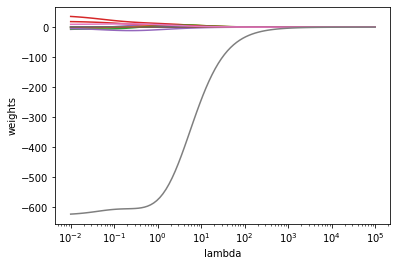

In [99]:
#Plot the Results
plot_ridge = plt.gca() 
     #gca() function iis used to get the current Axes instance on the current figure.
plot_ridge.plot(lambda_grid, models)
plot_ridge.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')

In [101]:
#K-fold Cross Validation to Choose the Best Model
ridgecv = RidgeCV(alphas = lambda_grid, cv = 10, normalize = True)
ridgecv.fit(X_train, Y_train)
ridgecv.alpha_

0.01

In [102]:
#Best Model Coefs:
ridgecv.coef_

array([ 0.00000000e+00,  1.18267506e+00,  2.49272802e-01,  3.56631646e+01,
       -7.46369846e+00,  4.10969590e-03,  4.87588241e-02, -4.98859776e-02,
        1.75993225e-01,  1.80413608e-01, -3.30390050e-02, -4.44992514e+00,
       -5.98774656e+00,  1.84200504e+01, -4.43536889e+00,  8.46890107e-02,
        9.37522882e+00, -6.23389722e+02])

In [105]:
ridgereg = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridgereg.fit(X_train, Y_train)
pred_ridge = ridgereg.predict(X_test)

In [107]:
#Absolute error
abs_err_ridge = abs(Y_test - pred_ridge)
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_ridge.mean(),
                                             'Median of AbsErrors' : abs_err_ridge.median(),
                                             'SD of AbsErrors' :     abs_err_ridge.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_ridge),
                                             'Min of AbsErrors':     abs_err_ridge.min(),
                                             'Max of AbsErrors':     abs_err_ridge.max()}, index = ['Ridge Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
BASIC LM,589.568840,316.976211,907.672518,440.473333,0.345312,5744.543389
improved LM,588.033378,350.261335,916.903603,444.940590,9.323908,5757.651010
BestSubset,584.686849,310.160763,908.415193,454.756897,1.584682,5774.900418
Forward Stepwise,580.300768,304.215344,913.765411,428.671338,0.668580,5768.595859
Ridge Reg,598.098821,322.178485,906.100522,477.100065,10.891338,5734.766500


In [108]:
lambda_grid = 10 ** np.linspace(1, -3, 100)

In [110]:
from sklearn.linear_model import Lasso, LassoCV
lassoreg = Lasso(normalize = True)

models = pd.DataFrame(index = lambda_grid, columns = X_train.columns)
coefs = []
for i in lambda_grid:
    lassoreg.set_params(alpha = i)
    lassoreg.fit(X_train, Y_train)
    models.loc[i, :] = lassoreg.coef_
models.shape

(100, 18)

Text(0, 0.5, 'weights')

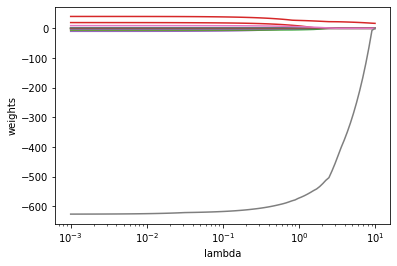

In [111]:
#Plot Results
plot_lasso = plt.gca() 
     #gca() function iis used to get the current Axes instance on the current figure.
plot_lasso.plot(lambda_grid, models)
plot_lasso.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')


In [112]:
#K-fold Cross Validation to Choose the Best Model
lassocv = LassoCV(alphas = lambda_grid, cv = 10, normalize = True)
lassocv.fit(X_train, Y_train)
lassocv.alpha_

0.13848863713938725

In [114]:
lassoreg = Lasso(alpha = lassocv.alpha_, normalize = True)
lassoreg.fit(X_train, Y_train)
pred_lasso = lassoreg.predict(X_test)

In [116]:
#Absolute error
abs_err_lasso = abs(Y_test - pred_lasso)
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_lasso.mean(),
                                             'Median of AbsErrors' : abs_err_lasso.median(),
                                             'SD of AbsErrors' :     abs_err_lasso.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_lasso),
                                             'Min of AbsErrors':     abs_err_lasso.min(),
                                             'Max of AbsErrors':     abs_err_lasso.max()}, index = ['Lasso Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
BASIC LM,589.568840,316.976211,907.672518,440.473333,0.345312,5744.543389
improved LM,588.033378,350.261335,916.903603,444.940590,9.323908,5757.651010
BestSubset,584.686849,310.160763,908.415193,454.756897,1.584682,5774.900418
Forward Stepwise,580.300768,304.215344,913.765411,428.671338,0.668580,5768.595859
Ridge Reg,598.098821,322.178485,906.100522,477.100065,10.891338,5734.766500
Lasso Reg,584.529430,311.870800,910.072155,466.891575,0.381770,5792.051195


# Decision Tree

In [119]:
from sklearn.tree import DecisionTreeRegressor
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
max_depth = [5, 7, 10]
min_samples_leaf = [5, 10, 15]
ccp_alpha = [0.0001, 0.001, 0.01]
grid = list(itertools.product(max_depth, min_samples_leaf, ccp_alpha))
grid = pd.DataFrame(data = grid, index = range(1, 28), columns = ['max_depth', 'min_samples_leaf', 'ccp_alpha'])

k = 10
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 28))

np.random.seed(123)
folds = np.random.randint(low = 1, high = k + 1, size = X_train.shape[0])

In [120]:
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        reg_tree = DecisionTreeRegressor(max_depth = grid.loc[i, 'max_depth'], 
                                         min_samples_leaf = grid.loc[i, 'min_samples_leaf'], 
                                         ccp_alpha = grid.loc[i, 'ccp_alpha'])
        tree_res = reg_tree.fit(X_train.iloc[folds != j, 1:], Y_train[folds != j])
        pred = tree_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, i - 1] = ((Y_train[folds == j] - pred) ** 2).mean()

In [121]:
cv_errors.mean(axis = 0).argmin() + 1

2

In [122]:
#Best Model
grid.loc[cv_errors.mean(axis = 0).argmin() + 1,:]

max_depth           5.000
min_samples_leaf    5.000
ccp_alpha           0.001
Name: 2, dtype: float64

In [123]:
#The Best Decision Tree Model Using All Variables
reg_tree = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 5, ccp_alpha = 0.001)
tree_res = reg_tree.fit(X_train.iloc[:, 1:], Y_train)
pred_tree = tree_res.predict(X_test.iloc[:, 1:])

In [125]:
#Absolute error
abs_err_tree = abs(Y_test - pred_tree)
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_tree.mean(),
                                             'Median of AbsErrors' : abs_err_tree.median(),
                                             'SD of AbsErrors' :     abs_err_tree.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_tree),
                                             'Min of AbsErrors':     abs_err_tree.min(),
                                             'Max of AbsErrors':     abs_err_tree.max()}, index = ['Decision Tree Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
BASIC LM,589.568840,316.976211,907.672518,440.473333,0.345312,5744.543389
improved LM,588.033378,350.261335,916.903603,444.940590,9.323908,5757.651010
BestSubset,584.686849,310.160763,908.415193,454.756897,1.584682,5774.900418
Forward Stepwise,580.300768,304.215344,913.765411,428.671338,0.668580,5768.595859
Ridge Reg,598.098821,322.178485,906.100522,477.100065,10.891338,5734.766500
Lasso Reg,584.529430,311.870800,910.072155,466.891575,0.381770,5792.051195
Decision Tree Reg,642.406379,177.898305,1360.832846,434.424794,2.475610,9533.200000


# model 8: Bagging

In [129]:
from sklearn.ensemble import BaggingRegressor
#Bagging: Using All Features
bagging_reg = BaggingRegressor(max_features = 17, random_state = 123, n_estimators = 500)
bagging_res = bagging_reg.fit(X_train.iloc[:, 1:], Y_train)
pred_bagging = bagging_res.predict(X_test.iloc[:, 1:])

In [131]:
#Absolute error
abs_err_bagging = abs(Y_test - pred_bagging)

In [132]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_bagging.mean(),
                                             'Median of AbsErrors' : abs_err_bagging.median(),
                                             'SD of AbsErrors' :     abs_err_bagging.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_bagging),
                                             'Min of AbsErrors':     abs_err_bagging.min(),
                                             'Max of AbsErrors':     abs_err_bagging.max()}, index = ['Bagging Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
BASIC LM,589.568840,316.976211,907.672518,440.473333,0.345312,5744.543389
improved LM,588.033378,350.261335,916.903603,444.940590,9.323908,5757.651010
BestSubset,584.686849,310.160763,908.415193,454.756897,1.584682,5774.900418
Forward Stepwise,580.300768,304.215344,913.765411,428.671338,0.668580,5768.595859
Ridge Reg,598.098821,322.178485,906.100522,477.100065,10.891338,5734.766500
Lasso Reg,584.529430,311.870800,910.072155,466.891575,0.381770,5792.051195
Decision Tree Reg,642.406379,177.898305,1360.832846,434.424794,2.475610,9533.200000
Bagging Reg,524.949295,170.135000,1002.899615,479.745500,0.842000,7023.690000


# Model 9: Random Forrest

In [133]:
from sklearn.ensemble import RandomForestRegressor
#Random Forrest: Using 6 Features
rf_reg = RandomForestRegressor(max_features = 6, random_state = 123, n_estimators = 500)
rf_res = rf_reg.fit(X_train.iloc[:, 1:], Y_train)

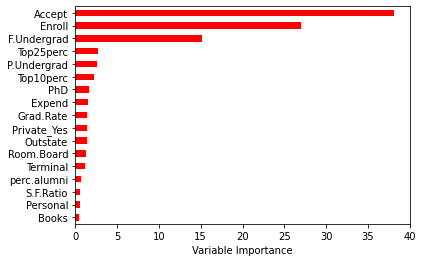

In [134]:
Importance = pd.DataFrame({'Importance':rf_res.feature_importances_ * 100}, 
                          index = X_train.iloc[:, 1:].columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [135]:
pred_rf = rf_res.predict(X_test.iloc[:, 1:])
pred_rf

array([  779.042,  1617.42 ,  1142.176,  2975.472,  1301.6  ,  1370.816,
         739.492, 15339.488,   859.274,  1441.984,   791.376,  3066.292,
        2832.468,   348.966,  4344.138,  1694.344,   584.606,  4574.556,
        1077.224,  1037.814,  3989.162,  2102.424,  1739.822, 12450.666,
        1311.666,   765.004, 15655.744,  1033.556,  6329.772,   411.538,
        2354.37 ,  2801.398,   483.006,   376.754,  4514.472,   833.94 ,
        3326.466,  4039.582,  5176.994,  3128.876,  4044.302, 13486.858,
        7424.118,  4804.806,  2273.876,  4170.876, 14223.026,  1770.76 ,
        6888.54 ,  8992.64 ,   814.258,  4229.626,  5349.908,   303.998,
        1098.928,  3265.762,   909.886,   885.85 ,   924.944,  4558.782,
        6279.408,   369.836,  3318.958,   390.408,  7374.324,  1463.748,
        5901.632,   349.472,   987.78 ,  2325.798,  2387.974,   678.016,
        1487.392,   567.418,   607.694,  1276.234,   571.82 ,  3461.848,
        3404.104,   515.224,   875.948,   353.366, 

In [136]:
#Absolute error
abs_err_rf = abs(Y_test - pred_rf)
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_rf.mean(),
                                             'Median of AbsErrors' : abs_err_rf.median(),
                                             'SD of AbsErrors' :     abs_err_rf.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_rf),
                                             'Min of AbsErrors':     abs_err_rf.min(),
                                             'Max of AbsErrors':     abs_err_rf.max()}, index = ['Random Forrest Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
BASIC LM,589.568840,316.976211,907.672518,440.473333,0.345312,5744.543389
improved LM,588.033378,350.261335,916.903603,444.940590,9.323908,5757.651010
BestSubset,584.686849,310.160763,908.415193,454.756897,1.584682,5774.900418
Forward Stepwise,580.300768,304.215344,913.765411,428.671338,0.668580,5768.595859
Ridge Reg,598.098821,322.178485,906.100522,477.100065,10.891338,5734.766500
Lasso Reg,584.529430,311.870800,910.072155,466.891575,0.381770,5792.051195
Decision Tree Reg,642.406379,177.898305,1360.832846,434.424794,2.475610,9533.200000
Bagging Reg,524.949295,170.135000,1002.899615,479.745500,0.842000,7023.690000
Random Forrest Reg,543.260744,190.320000,987.322567,523.146500,2.816000,6386.142000



Model 10: GB Regression

In [137]:
from sklearn.ensemble import GradientBoostingRegressor
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 0.9]
max_depth = [1, 3, 5]
grid = list(itertools.product(learning_rate, subsample, max_depth))
grid = pd.DataFrame(data = grid, index = range(1, 28), columns = ['learning_rate', 'subsample', 'max_depth'])

In [138]:
k = 10
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 28))

In [139]:
for i in range(1, grid.shape[0] + 1):
    for j in range(1, k + 1):
        boosting_reg = GradientBoostingRegressor(learning_rate = grid.loc[i, 'learning_rate'], 
                                                 subsample = grid.loc[i, 'subsample'], 
                                                 max_depth = grid.loc[i, 'max_depth'],
                                                 random_state = 1234)
        boosting_res = boosting_reg.fit(X_train.iloc[folds != j, 1:], Y_train[folds != j])
        pred = boosting_res.predict(X_train.iloc[folds == j, 1:])
        cv_errors.iloc[j - 1, i - 1] = ((Y_train[folds == j] - pred) ** 2).mean()

In [140]:
cv_errors.mean(axis = 0)

1     1.078107e+07
2     1.021715e+07
3     1.015596e+07
4     1.078704e+07
5     1.018145e+07
6     1.010380e+07
7     1.078742e+07
8     1.013954e+07
9     1.007551e+07
10    4.594006e+06
11    2.620358e+06
12    2.461191e+06
13    4.634781e+06
14    2.537623e+06
15    2.301556e+06
16    4.662675e+06
17    2.513106e+06
18    2.292403e+06
19    9.016316e+05
20    7.914002e+05
21    7.417638e+05
22    8.833008e+05
23    7.695635e+05
24    8.045322e+05
25    9.408933e+05
26    7.460491e+05
27    8.004592e+05
dtype: float64

In [141]:
grid.iloc[cv_errors.mean(axis = 0).argmin() + 1, :]

learning_rate    0.1
subsample        0.7
max_depth        1.0
Name: 22, dtype: float64

In [142]:
boosting_reg = GradientBoostingRegressor(learning_rate = 0.1,  #learning rate
                                         n_estimators = 1000,  #the total number of trees to fit
                                         subsample = 0.9,      #the fraction of samples to be used,  
                                                                    #if .< 1, Stochastic GB
                                         max_depth = 3,        #the maximum depth of each tree
                                         min_samples_leaf = 5, #the minimum number of observations in the leaf nodes of the trees
                                         random_state = 1234)

boosting_res = boosting_reg.fit(X_train.iloc[:, 1:], Y_train)

In [143]:
pred_boosting = boosting_res.predict(X_test.iloc[:, 1:])

In [145]:
#Absolute error
abs_err_boosting = abs(Y_test - pred_boosting)
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_boosting.mean(),
                                             'Median of AbsErrors' : abs_err_boosting.median(),
                                             'SD of AbsErrors' :     abs_err_boosting.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_boosting),
                                             'Min of AbsErrors':     abs_err_boosting.min(),
                                             'Max of AbsErrors':     abs_err_boosting.max()}, index = ['GB Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
BASIC LM,589.568840,316.976211,907.672518,440.473333,0.345312,5744.543389
improved LM,588.033378,350.261335,916.903603,444.940590,9.323908,5757.651010
BestSubset,584.686849,310.160763,908.415193,454.756897,1.584682,5774.900418
Forward Stepwise,580.300768,304.215344,913.765411,428.671338,0.668580,5768.595859
Ridge Reg,598.098821,322.178485,906.100522,477.100065,10.891338,5734.766500
Lasso Reg,584.529430,311.870800,910.072155,466.891575,0.381770,5792.051195
Decision Tree Reg,642.406379,177.898305,1360.832846,434.424794,2.475610,9533.200000
Bagging Reg,524.949295,170.135000,1002.899615,479.745500,0.842000,7023.690000
Random Forrest Reg,543.260744,190.320000,987.322567,523.146500,2.816000,6386.142000
GB Reg,509.620652,190.678671,924.214038,452.146205,0.257381,6375.244882
